### Overview

Multi-armed bandit problem:(a classic reinforcement learning problem that exemplifies the exploration-exploitation tradeoff dilemma)
![](https://nodata.science/images/pydata2017/slide-43.png)

- Problem:A fixed limited set of resources must be allocated between competing (alternative) choices in a way that maximizes     their expected gain, when each choice's properties are only partially known at the time of allocation, and may become better   understood as time passes or by allocating resources to the choice.

- The multi-armed bandit problem models an agent that simultaneously attempts to acquire new knowledge (called "exploration")     and optimize their decisions based on existing knowledge (called "exploitation"). The agent attempts to balance these           competing tasks in order to maximize their total value over the period of time considered.The problem requires balancing       reward maximization based on the knowledge already acquired with attempting new actions to further increase knowledge. This     is known as the exploitation vs. exploration tradeoff in machine learning.


-  Contextual bandit: A particularly useful version of the multi-armed bandit is the contextual multi-armed bandit problem. In    this problem, in each iteration an agent has to choose between arms. Before making the choice, the agent sees a d-              dimensional feature vector(context vector), associated with the current iteration. The learner uses these context vectors      along with the rewards of the arms played in the past to make the choice of the arm to play in the current iteration. Over      time, the learner's aim is to collect enough information about how the context vectors and rewards relate to each other, so    that it can predict the next best arm to play by looking at the feature vectors.

- Constrained contextual bandit:Constrained contextual bandit (CCB) is such a model that considers both the time and budget       constraints in a multi-armed bandit setting.

An example Scenario:

- Suppose we have d -arms.For example arms are ads that is disaplayed to user each time they connect to web page.
- Each user that connects to this web page makes round.
- At each round n, we choose one ads to display to user.
- Each i ads gives the reward r(i,n) at round n .
  A simple example 
          r(i,n)=1 ; if user clicked that ads 
                =0 ; if user didn't clicked that ads            
- Here our goal is to maximize the reward value as we go over many rounds.

Solutions Multi armed bandit problem:


- Upper Confidence Bound Algorithm:

![](https://www.aionlinecourse.com/uploads/tutorials/2018/09/21_ucb_2.png)
    
   



            





In [ ]:
# Implementation using libraries:

Libraries Doc Links:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

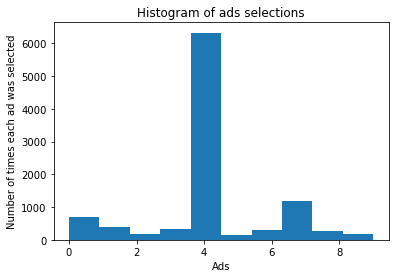

In [5]:
# Upper Confidence Bound

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/babangain/Machine-Learning/master/Ads_CTR_Optimisation.csv')

''''
# first try random selection and reward generation
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward
    
Note : This Results near about uniform distributions in visualization 
    
'''


# Implementing UCB 
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d   #vector of size d with zeros # ie no of times the ad i was selected upto round n
sums_of_rewards = [0] * d  # ie sum of rewards of ad i upto round n
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400  #some larger value initiated
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
print(ads_selected)    
print(total_reward)


# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()